# ATV 03 - Deep learning com Keras na base MNIST

## Imports e Divisão train/test

In [123]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
import keras_tuner

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import numpy as np
import random

RANDOM_STATE = 42

random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

In [124]:
(X_all, y_all), (X_test, y_test) = mnist.load_data()
X_all.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [125]:
X_train = X_all[10000:]
X_valid = X_all[:10000]

y_train = y_all[10000:]
y_valid = y_all[:10000]

type(X_test)

numpy.ndarray

## Visualizando algumas imagens da base

Imagens 28x28 de ints representando a escala de cinza de 0 (preto) a 255 (branco)

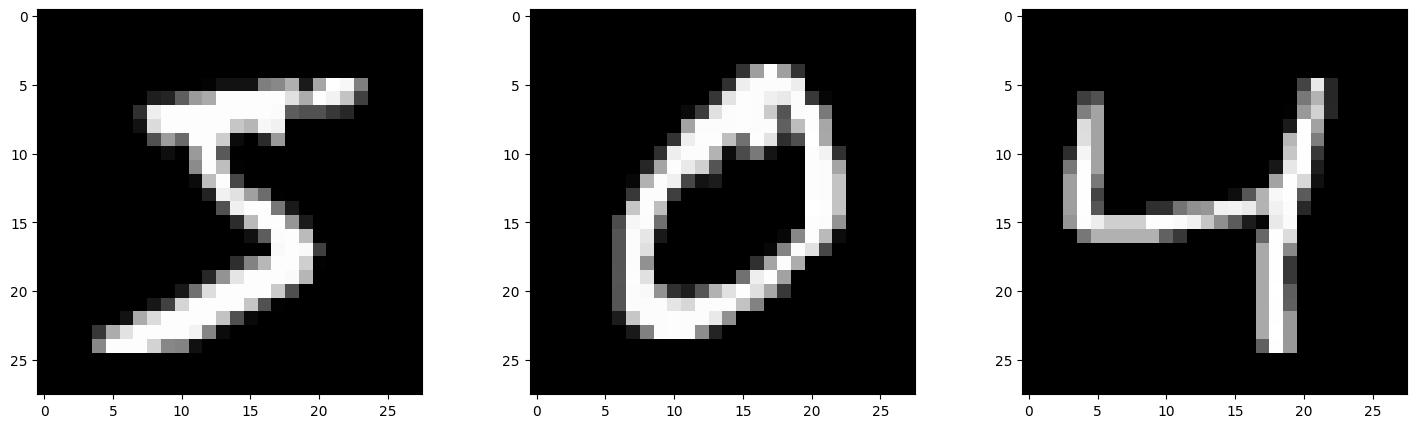

In [126]:
plt.figure(figsize=(18, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.axis(True)
    plt.imshow(X_all[i], cmap='gray')
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

In [127]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254,
        255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## Normalização dos pixels para o range 0, 1

achatando cada linha 2D 28 x 28 em um array 1D de tamanho 784

considerar a intensidade de cada pixel como sua feature individual é uma abordagem "ingênua" e simplória porem suficiente para esse caso. 

In [128]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype("float32") / 255

X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype("float32") / 255

X_valid = X_valid.reshape((X_valid.shape[0], 28 * 28))
X_valid = X_valid.astype("float32") / 255

## Encoding da saída

A camada de saída terá 10 neurônios representando os caracteres de 0 a 9, e cada um terá como saída a probabilidade de ser cada um. Para isso é necessário colocar como entrada da classe real um vetor da classe one-hot encoded, em que por tabela cada index representa a probabilidade de ser cada caracter

In [129]:
y_train[:10]

array([3, 8, 7, 9, 9, 0, 1, 1, 5, 2], dtype=uint8)

In [130]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)
y_train[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [131]:
def download_mnist_and_preprocess():

    # download and holdout
    (X_all, y_all), (X_test, y_test) = mnist.load_data()
    
    X_train = X_all[10000:]
    X_valid = X_all[:10000]

    y_train = y_all[10000:]
    y_valid = y_all[:10000]

    # normalize pixels to [0, 1] range
    X_train = X_train.reshape((X_train.shape[0], 28 * 28))
    X_train = X_train.astype("float32") / 255

    X_test = X_test.reshape((X_test.shape[0], 28 * 28))
    X_test = X_test.astype("float32") / 255

    X_valid = X_valid.reshape((X_valid.shape[0], 28 * 28))
    X_valid = X_valid.astype("float32") / 255

    # one hot encode output
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    y_valid = to_categorical(y_valid)

    return [(X_train, y_train), (X_valid, y_valid), (X_test, y_test)]



## Modelo Baseline

Arquitetura:
- Entrada: array 1D de tamanho [784 x 1]
- 2 Hidden Layers densas (todos os neuronios totalmente conectados com os neurons da camada posterior) com actv func não linear
- Saída: 10 neurons, 1 para cada classe, passando por uma softmax para produzir as probas, depois argmax para determinar a classe

- func de perda: Cross Entropy Loss

In [132]:
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_845"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=10,
    restore_best_weights=True
)

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [134]:
train_res = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping]
)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8643 - loss: 0.4780 - val_accuracy: 0.9450 - val_loss: 0.1755
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9601 - loss: 0.1360 - val_accuracy: 0.9607 - val_loss: 0.1267
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9748 - loss: 0.0895 - val_accuracy: 0.9660 - val_loss: 0.1112
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9816 - loss: 0.0650 - val_accuracy: 0.9692 - val_loss: 0.1129
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9866 - loss: 0.0491 - val_accuracy: 0.9709 - val_loss: 0.1136
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9903 - loss: 0.0375 - val_accuracy: 0.9702 - val_loss: 0.1221
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9922 - loss: 0.0291 - val_accuracy: 0.9717 - val_loss: 0.1274
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9933 - loss: 0.0237 - val_accu

In [135]:
train_loss = train_res.history["loss"]
train_acc = train_res.history["accuracy"]
valid_loss = train_res.history["val_loss"]
valid_acc = train_res.history["val_accuracy"]



In [136]:
pred_probas = model.predict(X_test)
pred_labels = [np.argmax(i) for i in pred_probas]

real_labels = tf.argmax(y_test, axis=1)

accuracy_score(pred_labels, real_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.9798

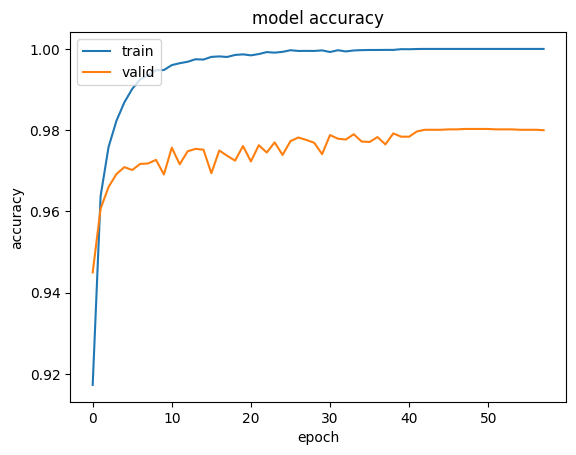

In [137]:
plt.plot(train_acc)
plt.plot(valid_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

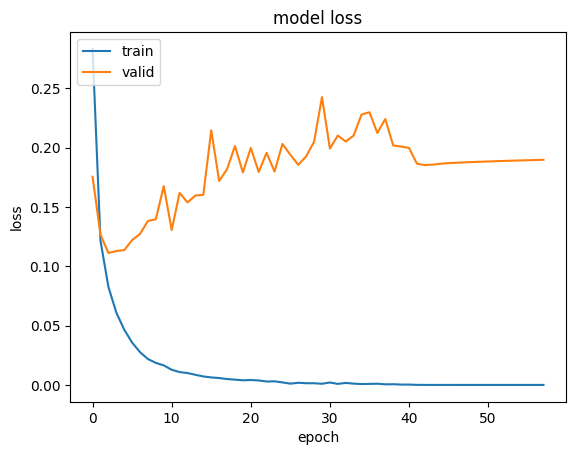

In [138]:
plt.plot(train_loss)
plt.plot(valid_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## Grid Search Cross Validation para tunar os hiperparâmetros

In [139]:
train, valid, test = download_mnist_and_preprocess()

X_train, y_train = train
X_valid, y_valid = valid

In [140]:
def create_model(num_hidden_layers, neurons_per_layer, activation_func):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    
    for _ in range(num_hidden_layers):
        model.add(Dense(neurons_per_layer, activation=activation_func))
    
    model.add(Dense(10, activation='sigmoid'))
    
    model.compile(
        optimizer="rmsprop",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model


def build_model(hp):
    num_hidden_layers = hp.Int("num_hidden_layers", min_value=1, max_value=5, step=1)
    neurons_per_layer = hp.Choice("neurons_per_layer", [128, 200, 300, 400, 500])
    activation_func = hp.Choice("activation", ["relu", "sigmoid"])
    
    # call existing model-building code with the hyperparameter values.
    model = create_model(
        num_hidden_layers=num_hidden_layers, neurons_per_layer=neurons_per_layer, activation_func=activation_func
    )
    return model


build_model(keras_tuner.HyperParameters())

<Sequential name=sequential_846, built=True>

In [141]:
tuner = keras_tuner.GridSearch(
    build_model,
    objective='val_accuracy',
    seed=RANDOM_STATE
)

# Perform the search
tuner.search(
    X_train, y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping],
    batch_size=64,
    verbose=1
)

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Print the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")

Trial 50 Complete [00h 01m 52s]
val_accuracy: 0.9674999713897705

Best val_accuracy So Far: 0.9794999957084656
Total elapsed time: 00h 42m 14s
Best hyperparameters: {'num_hidden_layers': 4, 'neurons_per_layer': 400, 'activation': 'relu'}


/usr/local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [153]:
best_model.get_config()

{'name': 'sequential',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 400,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regulari

Acima foi utilizado o GridSearch do Keras que encontrou a config {'num_hidden_layers': 4, 'neurons_per_layer': 400, 'activation': 'relu'}

In [142]:
gs_train_res = best_model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping]
)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9940 - loss: 0.0211 - val_accuracy: 0.9773 - val_loss: 0.1555
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9948 - loss: 0.0203 - val_accuracy: 0.9794 - val_loss: 0.1447
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9952 - loss: 0.0188 - val_accuracy: 0.9799 - val_loss: 0.1435
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9963 - loss: 0.0139 - val_accuracy: 0.9775 - val_loss: 0.2014
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9969 - loss: 0.0129 - val_accuracy: 0.9776 - val_loss: 0.1686
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9960 - loss: 0.0158 - val_accuracy: 0.9811 - val_loss: 0.1596
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9974 - loss: 0.0114 - val_accuracy: 0.9779 - val_loss: 0.1935
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9974 - loss: 0.0089 - val_a

In [143]:
gs_train_loss = gs_train_res.history["loss"]
gs_train_acc = gs_train_res.history["accuracy"]
gs_valid_loss = gs_train_res.history["val_loss"]
gs_valid_acc = gs_train_res.history["val_accuracy"]

In [147]:
gs_pred_probas = best_model.predict(X_test)
gs_pred_labels = [np.argmax(i) for i in gs_pred_probas]

real_labels = tf.argmax(y_test, axis=1)

gridsearch_acc = accuracy_score(gs_pred_labels, real_labels)
baseline_acc = accuracy_score(pred_labels, real_labels)

print(f"Accuracy com GridSearch: {gridsearch_acc}")
print(f"Accuracy Baseline: {baseline_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy com GridSearch: 0.9832
Accuracy Baseline: 0.9798


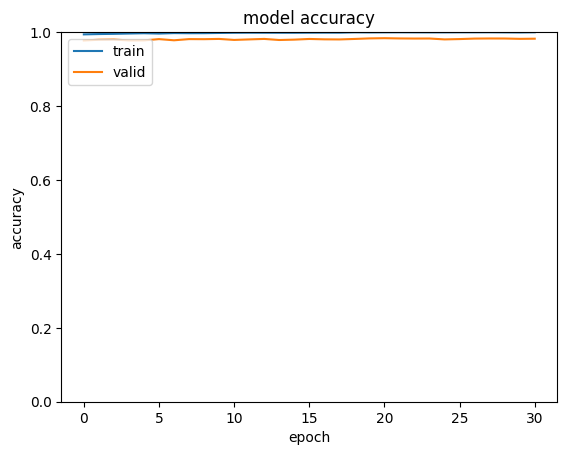

In [152]:
plt.plot(gs_train_acc)
plt.plot(gs_valid_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.ylim(0, 1)
plt.show()

Melhorando a visualização acima:

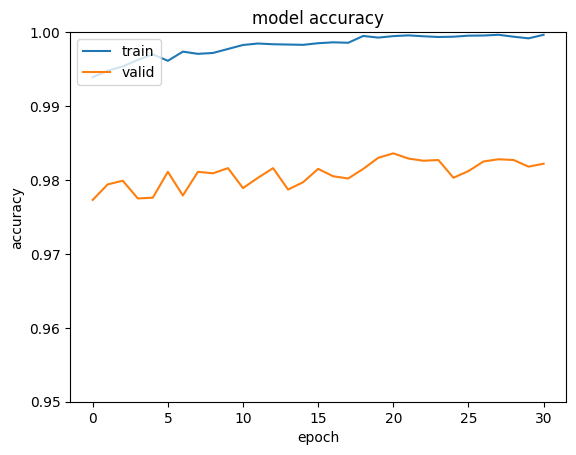

In [151]:
plt.plot(gs_train_acc)
plt.plot(gs_valid_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.ylim(0.95, 1)
plt.show()

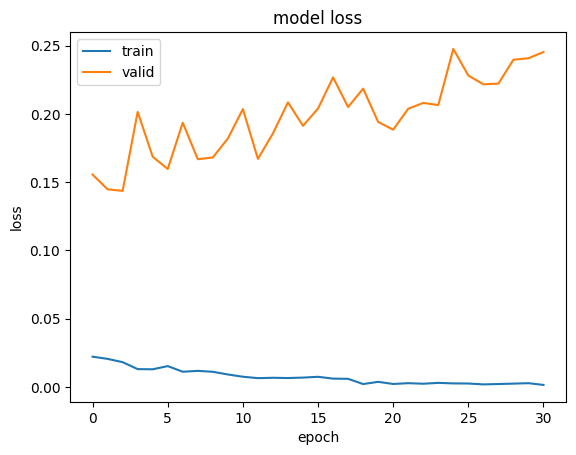

In [146]:
plt.plot(gs_train_loss)
plt.plot(gs_valid_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.ylim(0)
plt.show()

O modelo com GridSearch foi re-treinado com os melhores parâmetros e obteve o resultado ótimo em 30 épocas. Confirma-se pelos gráficos que a acurácia foi otimizada, atingindo acc de validação um pouco superior a 0.98 e acc de teste em 0.9832 superando os 0.9798 do modelo baseline. Aqui é o clássico caso de um possível "Ganho Marginal Decrescente". Será que esse ganho de 0.0034 de acurácia vale os 42min de gridsearch sobre os 1min40s de treino baseline? (Claro que há outras formas melhores de busca por um conjunto de hiperparâmetros mas meu questionamento se atém aos requisitos da atividade)
